In [ ]:
import cv2
import glob
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score, confusion_matrix
from joblib import dump
import pandas as pd
from PIL import Image
from sklearn.linear_model import LogisticRegression
from skimage.transform import resize
from skimage.color import rgb2gray
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


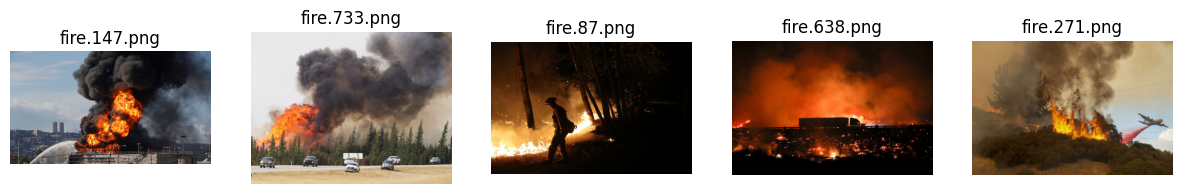

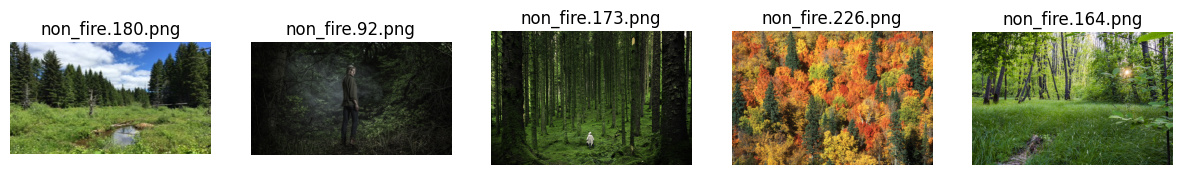

In [ ]:
import os
import random
import matplotlib.pyplot as plt
from PIL import Image

def load_random_images(folder_path, num_images):
    image_files = os.listdir(folder_path)

    random_images = random.sample(image_files, num_images)

    plt.figure(figsize=(15, 5))
    for i, image_name in enumerate(random_images):
        image_path = os.path.join(folder_path, image_name)
        img = Image.open(image_path)
        plt.subplot(1, num_images, i+1)
        plt.imshow(img)
        plt.axis('off')
        plt.title(image_name)
    plt.show()

folder_path_1 = '/content/drive/My Drive/fire_dataset/fire_images'
folder_path_2 = '/content/drive/My Drive/fire_dataset/non_fire_images'

num_images = 5

load_random_images(folder_path_1, num_images)
load_random_images(folder_path_2, num_images)


In [ ]:
def check_image_sizes(folder_path):
    image_files = os.listdir(folder_path)
    image_sizes = set()

    for image_name in image_files:
        image_path = os.path.join(folder_path, image_name)
        image = Image.open(image_path)
        image_size = image.size
        image_sizes.add(image_size)

    return image_sizes

image_sizes_1 = check_image_sizes(folder_path_1)
image_sizes_2 = check_image_sizes(folder_path_2)

print("Image sizes in Folder 1:", image_sizes_1)
print("Image sizes in Folder 2:", image_sizes_2)

Image sizes in Folder 1: {(920, 621), (990, 564), (992, 744), (848, 480), (660, 280), (622, 415), (1200, 800), (822, 625), (390, 275), (740, 555), (470, 313), (1365, 1138), (220, 147), (626, 417), (292, 172), (800, 551), (900, 400), (650, 365), (1170, 660), (610, 436), (670, 450), (600, 800), (590, 350), (1050, 591), (760, 380), (6720, 4480), (600, 400), (3866, 2426), (1140, 759), (3200, 1680), (390, 270), (4000, 3000), (3000, 2000), (2400, 1596), (410, 275), (570, 340), (730, 478), (4608, 3440), (792, 700), (1000, 500), (235, 279), (305, 460), (1920, 1080), (2560, 1706), (1536, 2048), (800, 1067), (960, 540), (720, 540), (900, 507), (3000, 1977), (961, 621), (2400, 1600), (720, 405), (860, 574), (800, 532), (630, 386), (481, 662), (700, 450), (2048, 1242), (3000, 2363), (1024, 681), (725, 403), (375, 281), (640, 426), (799, 599), (600, 399), (810, 456), (653, 490), (960, 400), (950, 633), (1920, 1079), (1024, 676), (520, 347), (480, 320), (960, 539), (4348, 2899), (3616, 2712), (922, 

In [ ]:
import glob
from PIL import Image
import numpy as np

fire_dir = glob.glob("/content/drive/My Drive/fire_dataset/fire_images/*.png")
no_fire_dir = glob.glob("/content/drive/My Drive/fire_dataset/non_fire_images/*.png")
images = []
labels = []

for filename in fire_dir:
  img = Image.open(filename)
  img = img.resize((64, 64))

  
  if img.mode == 'RGBA' or img.mode == 'L':
    continue  # Skip images with unwanted shapes

  img = np.array(img)
  #print(img.shape)
  img = np.array(img)
  if len(img.shape) != 3 or img.shape[2] != 3:
    continue  # Skip grayscale images
  img = img / 255.0
  img = img.flatten()
  img = img.reshape((12288,))

  images.append(img)
  labels.append(0)

for filename in no_fire_dir:
  img = Image.open(filename)
  img = img.resize((64, 64))
  if img.mode == 'RGBA' or img.mode == 'L':
    continue  # Skip images with unwanted shapes

  img = np.array(img)
  img = np.array(img)
  if len(img.shape) != 3 or img.shape[2] != 3:
    continue  # Skip grayscale images
  img = img / 255.0
  img = img.flatten()
  img = img.reshape((12288,))

  images.append(img)
  labels.append(1)

images = np.array(images)
print(images.shape)
labels = np.array(labels)
print(labels.shape)


In [ ]:
images = np.array(images)
labels = np.array(labels)
print(images.shape)
print(labels.shape)

(990, 12288)
(990,)


In [56]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)

model.fit(X_train, y_train)

score = model.score(X_test, y_test)

print("Model Score:", score)


Model Score: 0.9242424242424242


In [57]:
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[143   6]
 [  9  40]]


In [63]:
######part e
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred_prob = model.predict_proba(X_test)[:, 1]  # Predicted probabilities of positive class

best_threshold = 0
best_accuracy = 0
for threshold in np.arange(0.1, 1.0, 0.1):
    y_pred = (y_pred_prob > threshold).astype(int)
    accuracy = accuracy_score(y_test, y_pred)
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_threshold = threshold

print("Best Threshold:", best_threshold)

# Apply the best threshold to the predicted probabilities
y_pred = (y_pred_prob > best_threshold).astype(int)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100))

confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)



Best Threshold: 0.2
Accuracy: 93.43%
Confusion Matrix:
[[141   8]
 [  5  44]]


In [61]:
dump(model, 'classifier.joblib')


['classifier.joblib']